# **Projet Machine Learning**

L’objectif est de prédire la variable Value-co2-emissions à partir des autres variables.

## **Partie I : Analyse exploratoire des données**

1) Commencez par une analyse descriptive unidimensionnelle des données.

#### Chargement des données

In [1]:
import pandas as pd
import numpy as np
# Lecture des données
## Charger les données ou les lire directement en précisant le chemin
path="/Users/hugoguilbot/VALDOM/INSA/Machine learning/Projet/global-data-on-sustainable-energy.csv"
data=pd.read_csv(path,sep=",",header=0)
# Vérification du contenu
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [2]:
data.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


Pour un conford supplémentaire, je traduit chaque variable en francais mais c'est totalement optionnel.

In [3]:
# Renommage des colonnes du DataFrame df en français
data.columns = [
    'Pays',
    'Année', 
    'Accès à l\'électricité (% de la population)',
    'Accès à des combustibles propres pour la cuisson',
    'Capacité de génération d\'électricité renouvelable par habitant',
    'Flux financiers vers les pays en développement (US $)',
    'Part des énergies renouvelables dans la consommation finale totale d\'énergie (%)',
    'Électricité provenant des combustibles fossiles (TWh)',
    'Électricité provenant du nucléaire (TWh)',
    'Électricité provenant des renouvelables (TWh)',
    'Électricité à faible émission de carbone (% de l\'électricité)',
    'Consommation d\'énergie primaire par habitant (kWh/personne)',
    'Niveau d\'intensité énergétique de l\'énergie primaire (MJ/$2017 PPA GDP)',
    'Émissions de CO2 (kt par pays)',
    'Renouvelables (% équivalent de l\'énergie primaire)',
    'Croissance du PIB',
    'PIB par habitant',
    'Densité (P/Km2)',
    'Superficie (Km2)',
    'Latitude',
    'Longitude'
]

# Affichage des 5 premières lignes de la base de données avec les noms de colonnes renommés
data.head()

,Pays,Année,Accès à l'électricité (% de la population),Accès à des combustibles propres pour la cuisson,Capacité de génération d'électricité renouvelable par habitant,Flux financiers vers les pays en développement (US $),Part des énergies renouvelables dans la consommation finale totale d'énergie (%),Électricité provenant des combustibles fossiles (TWh),Électricité provenant du nucléaire (TWh),Électricité provenant des renouvelables (TWh),...,Consommation d'énergie primaire par habitant (kWh/personne),Niveau d'intensité énergétique de l'énergie primaire (MJ/$2017 PPA GDP),Émissions de CO2 (kt par pays),Renouvelables (% équivalent de l'énergie primaire),Croissance du PIB,PIB par habitant,Densité (P/Km2),Superficie (Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


Les types correspondants aux variables :

In [4]:
print(data.dtypes)

Pays                                                                                 object
Année                                                                                 int64
Accès à l'électricité (% de la population)                                          float64
Accès à des combustibles propres pour la cuisson                                    float64
Capacité de génération d'électricité renouvelable par habitant                      float64
Flux financiers vers les pays en développement (US $)                               float64
Part des énergies renouvelables dans la consommation finale totale d'énergie (%)    float64
Électricité provenant des combustibles fossiles (TWh)                               float64
Électricité provenant du nucléaire (TWh)                                            float64
Électricité provenant des renouvelables (TWh)                                       float64
Électricité à faible émission de carbone (% de l'électricité)                   

#### Distribution des variables

In [5]:
import matplotlib.pyplot as plt

def plot_distribution(df,k):

    '''
      cette fonction permet de représenter les distributions des variables de df
      maximum 12 à la fois. Il faut faire varier k pour voir l'ensemble des distributions
      de X1new

      pré: df est un dataframe.
           k est un entier
    '''

    #plt.style.use('seaborn')
    fig, axs = plt.subplots(nrows=4,ncols=3, figsize = (15, 15))
    fig.suptitle('Distribution des variables',fontsize = 10)
    i=0
    j=0
    for col in df.columns[k:k+20]:
        axs[i,j].hist(df[col], edgecolor = 'white', align = 'mid', bins = 20)
        axs[i,j].set_xlabel(col)
        j=j+1
        if j==3:
            j=0
            i=i+1
        if i==4:
            break

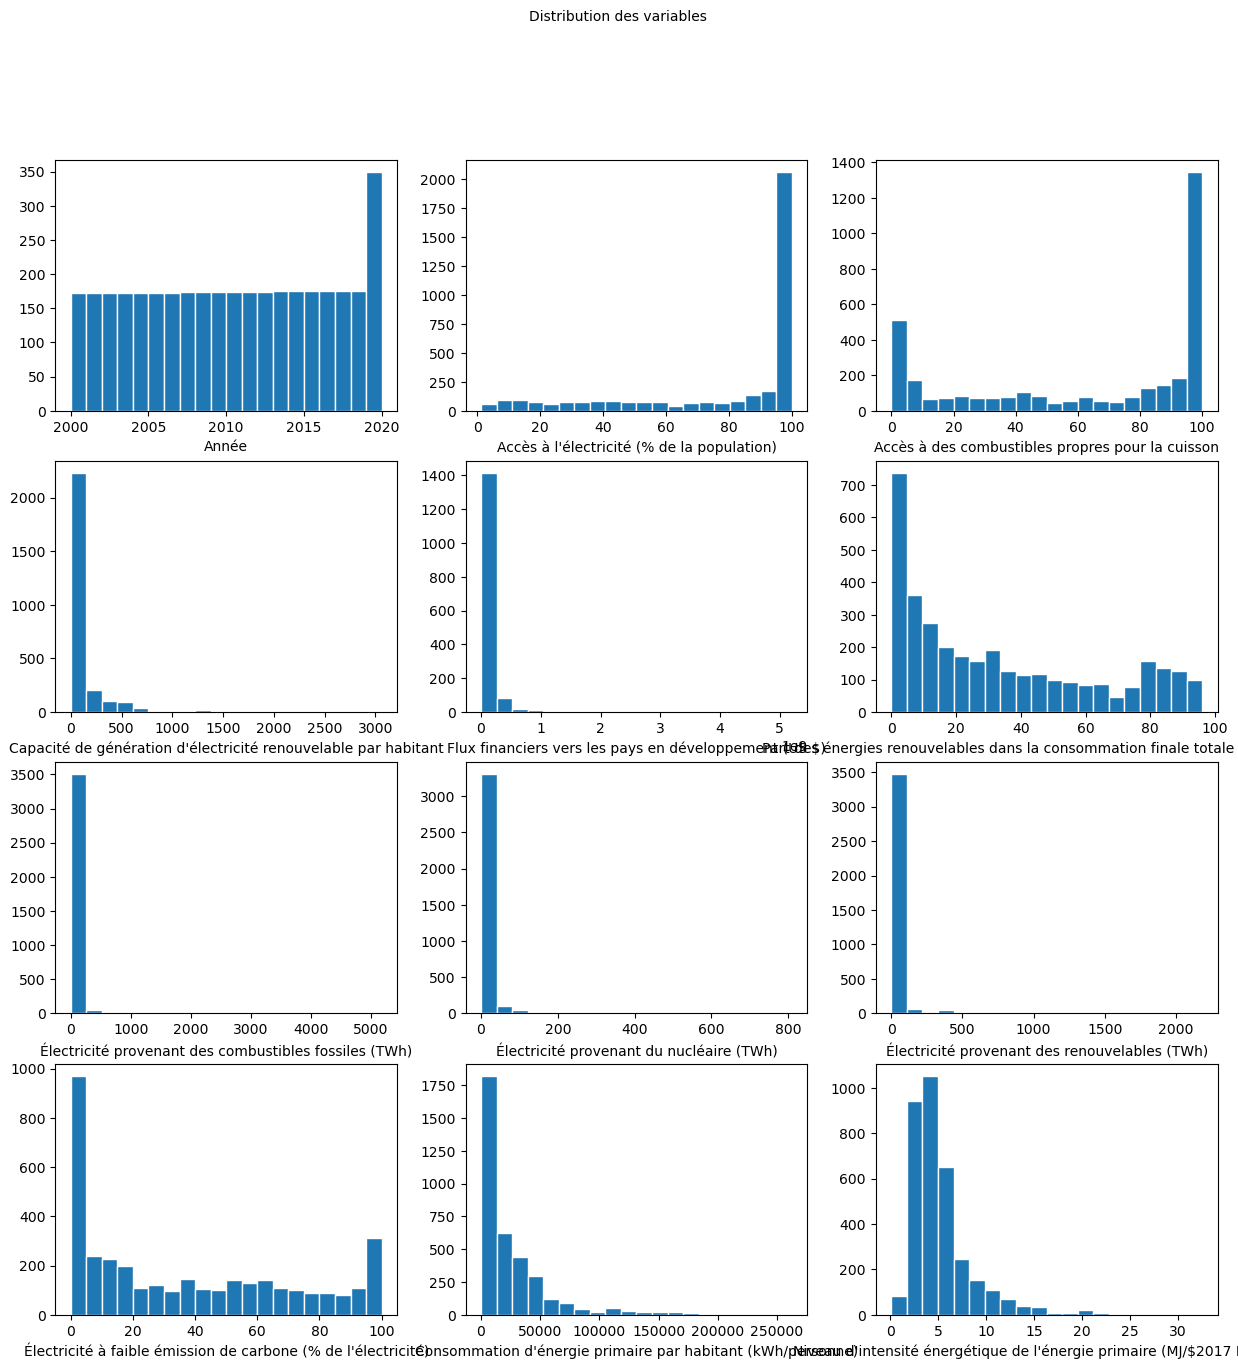

In [6]:
plot_distribution(data,1)  #

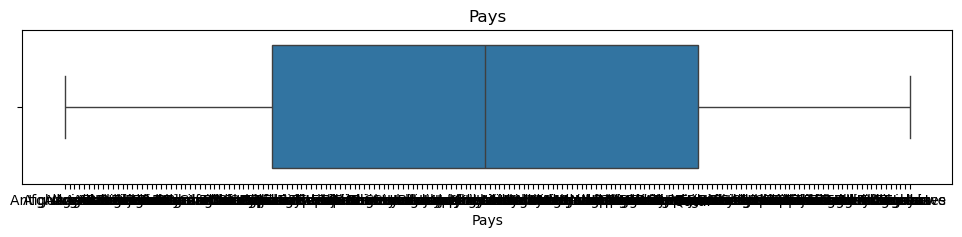

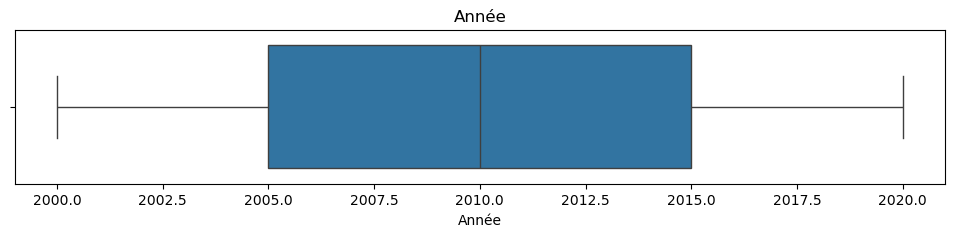

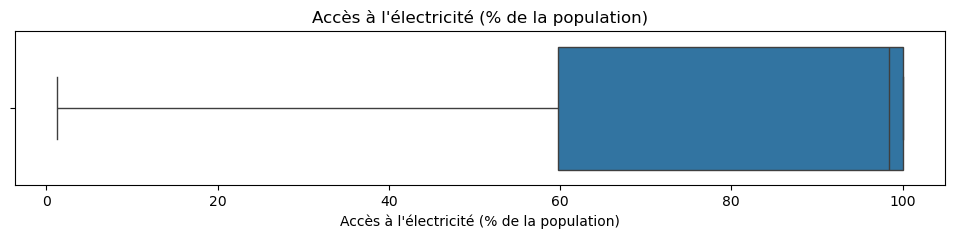

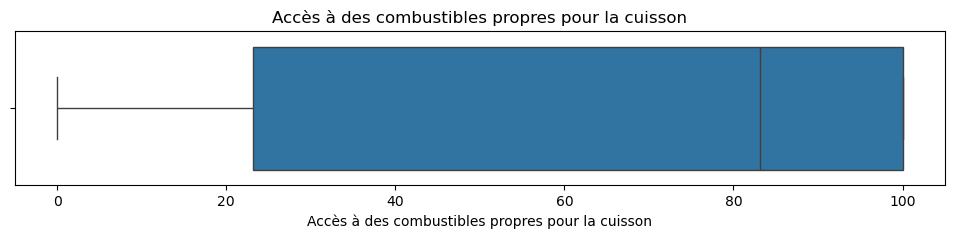

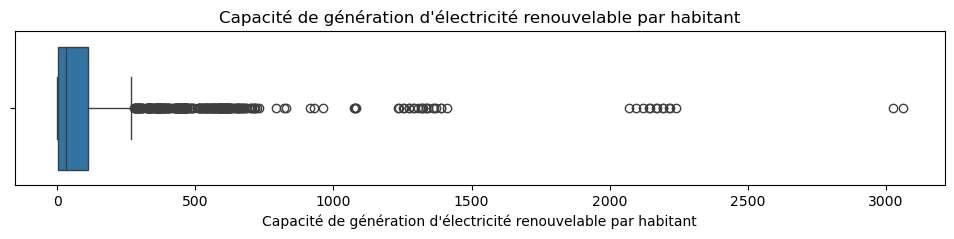

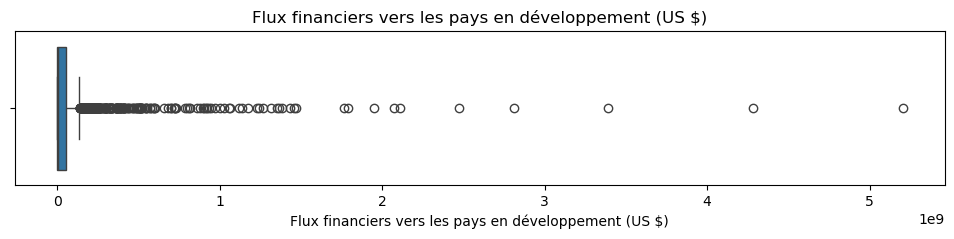

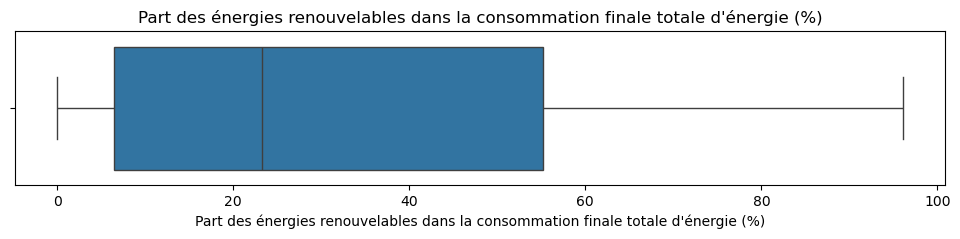

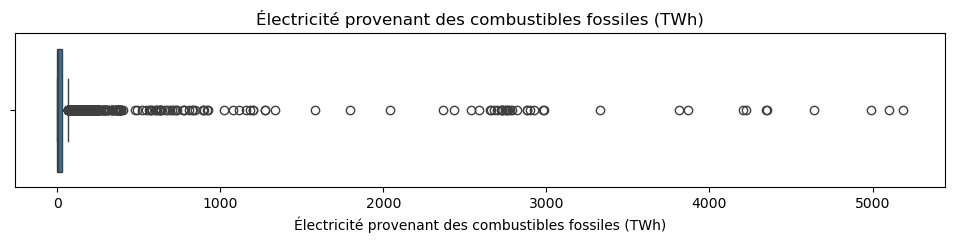

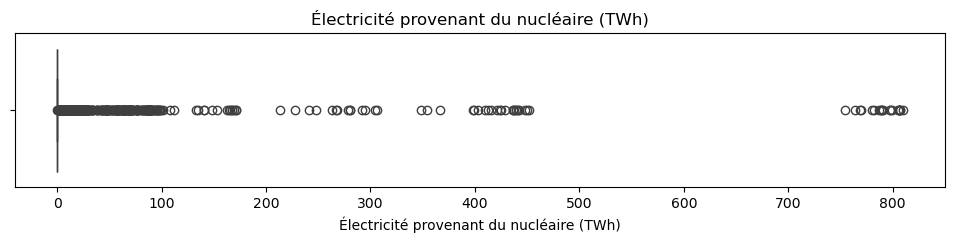

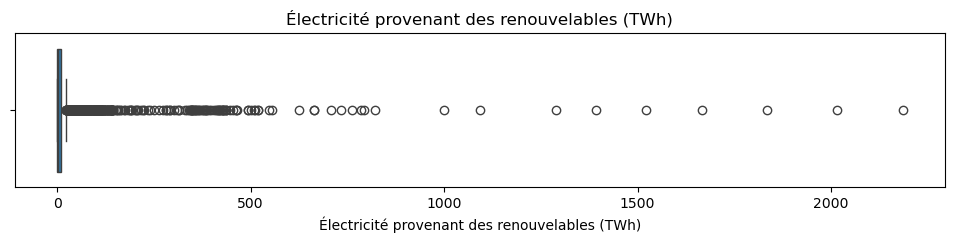

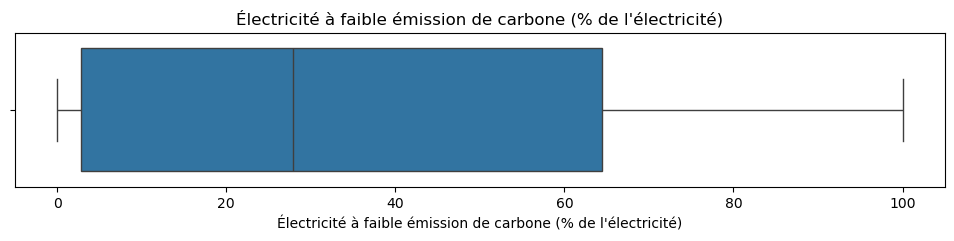

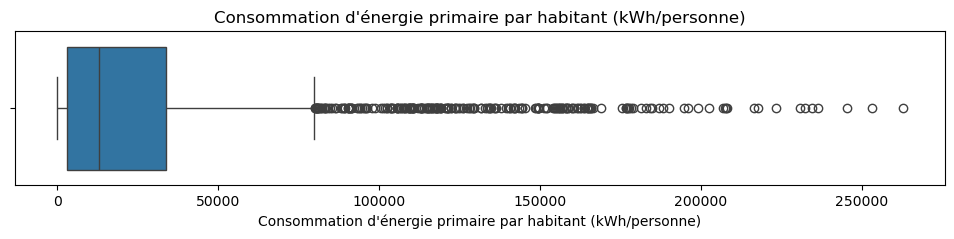

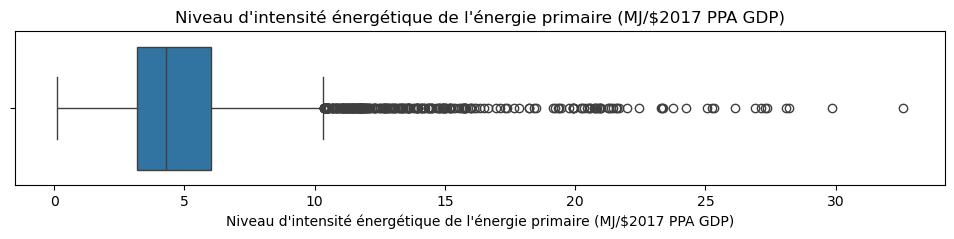

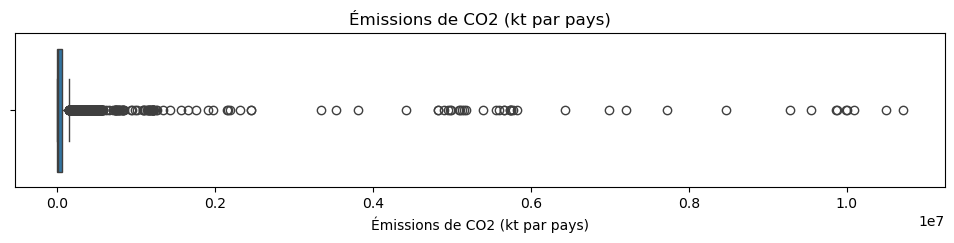

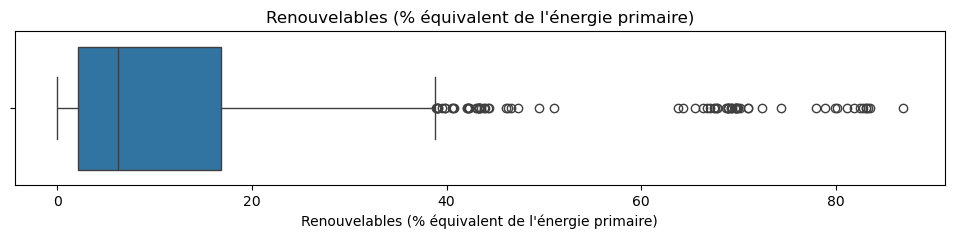

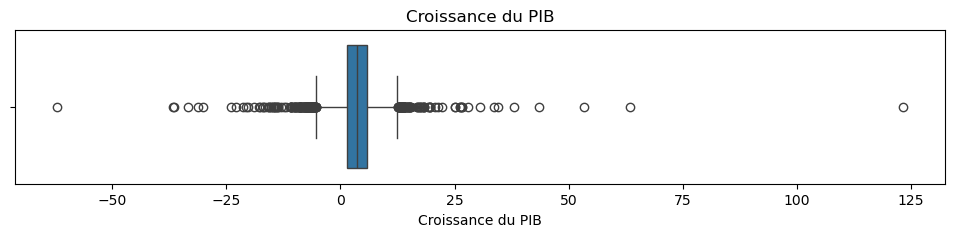

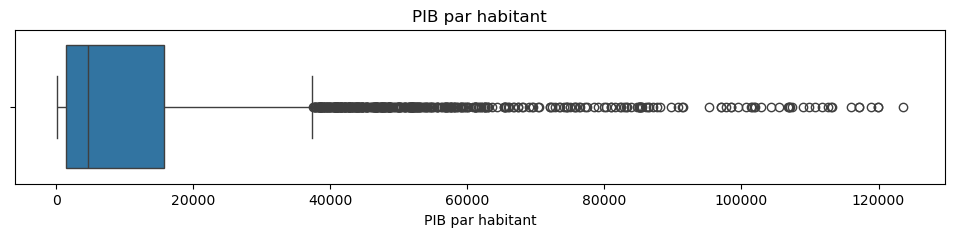

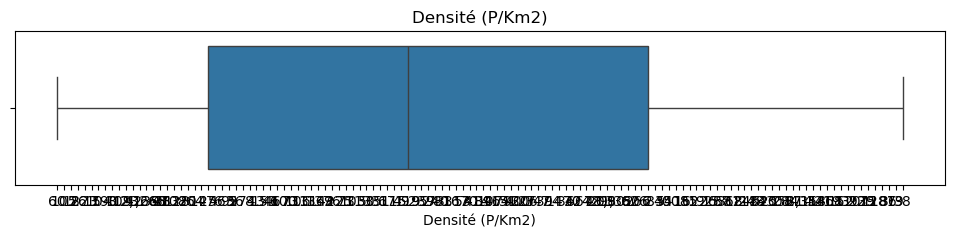

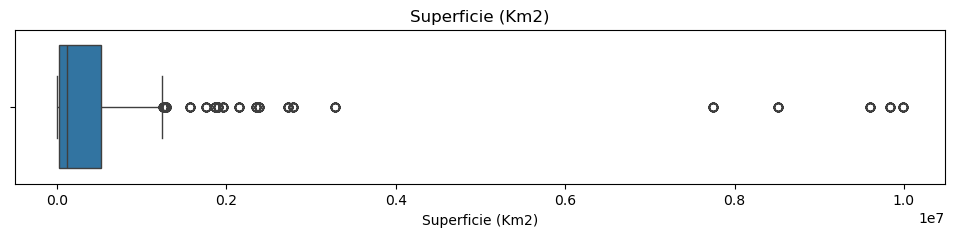

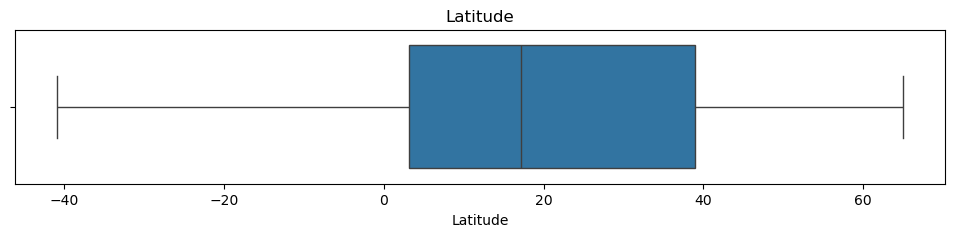

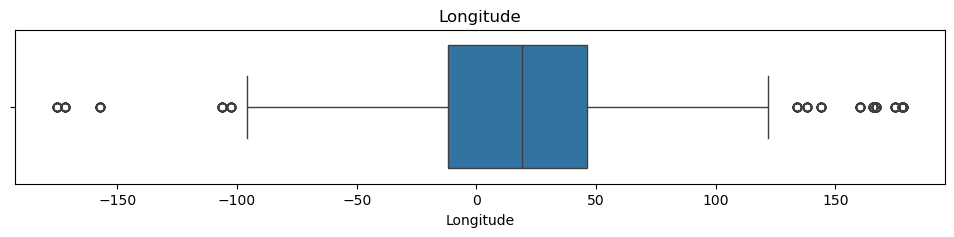

In [7]:
import seaborn as sns

# Tracé des boxplots pour chaque variable
for column in data.columns:
    fig, ax = plt.subplots(figsize=(12, 2))
    #fig, axs = plt.subplots(nrows=4,ncols=3, figsize = (15, 15))
    sns.boxplot(x=data[column], ax=ax)
    plt.title(column)
    plt.show()

Quand on regarde de plus prêt la distribution de la valeur cible, on remarque qu'elle est trés mal distribué, il y a beaucoup de valeur aberrantes : 

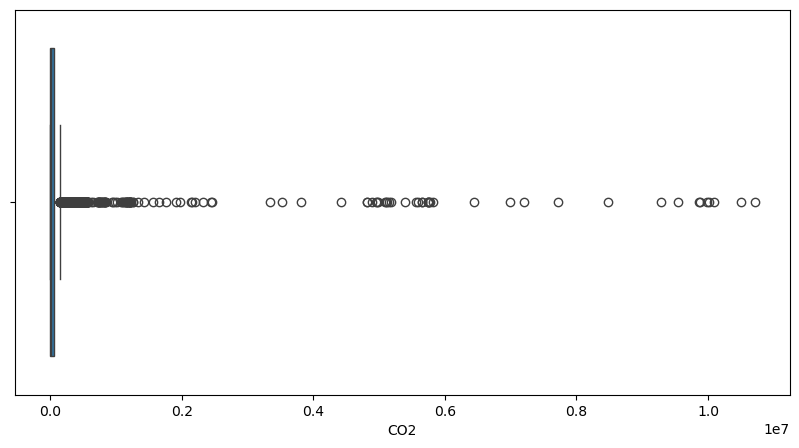

In [8]:
# Boxplot runtime
plt.figure(figsize=(10,5))
plt.xlabel('CO2')
sns.boxplot(x=data['Émissions de CO2 (kt par pays)'])
plt.show()

Si on fait le log de cette variable, on obtient une meilleure distribution même si il reste quelques valeurs aberrantes :

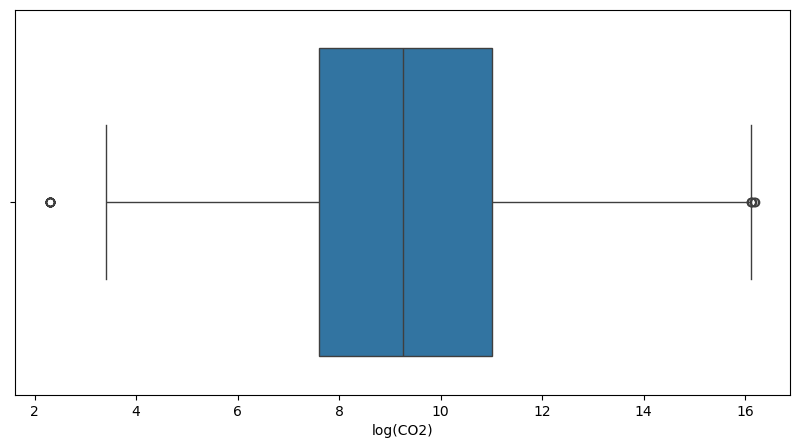

In [9]:
plt.figure(figsize=(10,5))
plt.xlabel('log(CO2)')
sns.boxplot(x=np.log(data['Émissions de CO2 (kt par pays)']))
plt.show()

#### Transformation des variables :

2) Des transformations des variables quantitatives vous semblent-t-elles pertinentes ?
N.B. Curieusement, la variable Density (P/Km2) n’est pas considérée comme une variable numérique, convertissez-là en une variable numérique. Convertissez la variable Year en une variable qualitative.

- transformation de la densité en valeur numérique

In [50]:
all_columns = data.columns.tolist()

title_Density = all_columns[17]
data[title_Density] = pd.to_numeric(data[title_Density], errors='coerce')


- Transformation de l'année en valeur quantitative

In [51]:
#Si FR : 
data['Année'] = data['Année'].astype(str)
#Si ENG :
#data['Year'] = data['Year'].astype(str)

- Visualisation des nouveaux types de données

In [52]:
print(data.dtypes)

Pays                                                                                 object
Année                                                                                object
Accès à l'électricité (% de la population)                                          float64
Accès à des combustibles propres pour la cuisson                                    float64
Capacité de génération d'électricité renouvelable par habitant                      float64
Flux financiers vers les pays en développement (US $)                               float64
Part des énergies renouvelables dans la consommation finale totale d'énergie (%)    float64
Électricité provenant des combustibles fossiles (TWh)                               float64
Électricité provenant du nucléaire (TWh)                                            float64
Électricité provenant des renouvelables (TWh)                                       float64
Électricité à faible émission de carbone (% de l'électricité)                   

### Visualisation

3) Visualisez la grande hétérogénéité des émissions de CO2 entre les pays. 

- Quels sont les 5 pays les plus émetteurs de CO2 ?

In [46]:

# Groupement par 'Entity' et calcul de la somme totale des émissions de CO2
#Si FR : 
total_co2_emissions = data.groupby('Pays')['Émissions de CO2 (kt par pays)'].sum()
#Si ENG :
#total_co2_emissions = data.groupby('Entity')['Value_co2_emissions_kt_by_country'].sum()
# Tri des pays par émissions totales de CO2
top_emitters = total_co2_emissions.sort_values(ascending=False).head(5)
print(top_emitters)

Pays
China            1.527328e+08
United States    1.065908e+08
India            3.267958e+07
Japan            2.367469e+07
Germany          1.547289e+07
Name: Émissions de CO2 (kt par pays), dtype: float64


In [49]:
import plotly.express as px

# Create a bar plot using Plotly Express
fig = px.bar(
    top_emitters,  # DataFrame containing the data
    x=top_emitters.index,  # x-values: 'Country' categories
    y=top_emitters.values,  # y-values: maximum 'CO2' emissions
    title='Top 5 Pays by Maximum CO2 Emissions',  
    labels={'Pays': 'Pays', 'CO2': 'CO2 Emissions'},  
    template='plotly_white' 
)

# Set the height of the plot
fig.update_layout(height=650)

# Display the plot
fig.show()

#### Valeurs manquantes :

4) Déterminer le taux de valeurs manquantes pour chaque variable.

- Déterminer le taux de valeurs manquantes pour chaque variable.

In [70]:
# Calcul du pourcentage de valeurs manquantes pour chaque colonne
missing_values_percentage = data.isnull().mean() * 100

# Affichage du pourcentage de valeurs manquantes
print(missing_values_percentage)


Pays                                                                                 0.000000
Année                                                                                0.000000
Accès à l'électricité (% de la population)                                           0.274048
Accès à des combustibles propres pour la cuisson                                     4.631406
Part des énergies renouvelables dans la consommation finale totale d'énergie (%)     5.316525
Électricité provenant des combustibles fossiles (TWh)                                0.575500
Électricité provenant du nucléaire (TWh)                                             3.453001
Électricité provenant des renouvelables (TWh)                                        0.575500
Électricité à faible émission de carbone (% de l'électricité)                        1.151000
Consommation d'énergie primaire par habitant (kWh/personne)                          0.000000
Niveau d'intensité énergétique de l'énergie primaire (MJ/$20

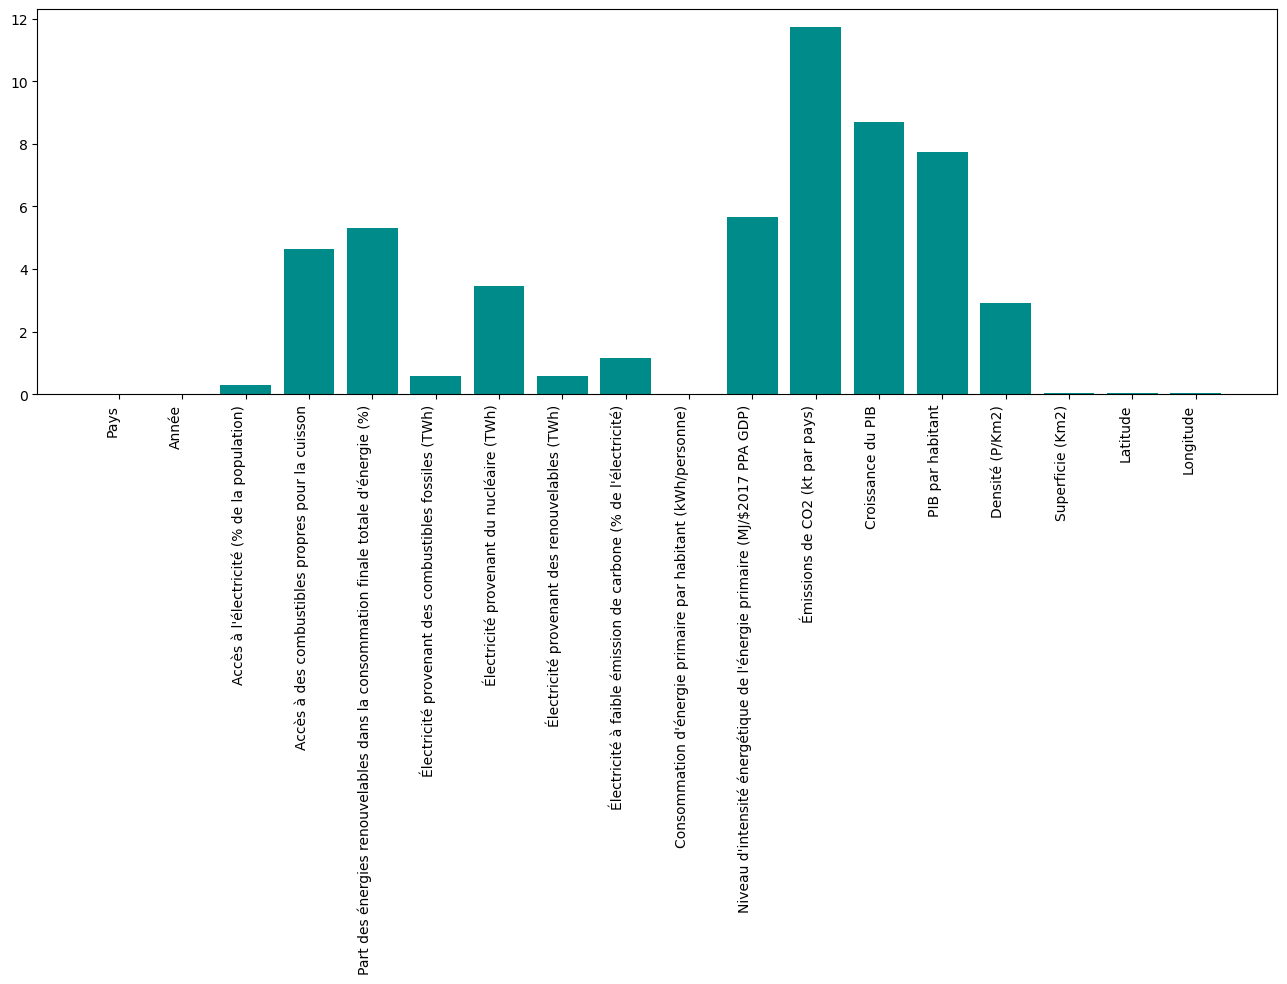

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5))
plt.bar(x=missing_values_percentage.index, height=missing_values_percentage.values, color='darkcyan')
plt.xticks(rotation=90, ha="right") 

plt.show()

 Les éléments avec le plus grand taux de valeurs manquantes sont Renewables (% equivalent primary energy), Financial flows to developing countries (US $),Renewable-electricity-generating-capacity-per-capita  ,Value_co2_emissions_kt_by_country et Energy intensity level of primary energy (MJ/$2017 PPP GDP).

 2. On propose de supprimer pour ce projet les variables comportant un taux de données manquantes très im- portant : Renewable-electricity-generating-capacity-per-capita, Financial flows to developing countries (US Dollars) et Renewables (% equivalent primary energy).

In [60]:
# Suppression des colonnes spécifiées si dataframe en ENG
# columns_to_drop = ['Renewable-electricity-generating-capacity-per-capita', 
#                    'Financial flows to developing countries (US $)', 
#                    'Renewables (% equivalent primary energy)']
#Si en FR :
# Suppression des colonnes spécifiées
columns_to_drop = ['Capacité de génération d\'électricité renouvelable par habitant',
    'Flux financiers vers les pays en développement (US $)',
    'Renouvelables (% équivalent de l\'énergie primaire)']

data.drop(columns=columns_to_drop, inplace=True)

KeyError: '["Capacité de génération d\'électricité renouvelable par habitant", \'Flux financiers vers les pays en développement (US $)\', "Renouvelables (% équivalent de l\'énergie primaire)"] not found in axis'

## Analyse descriptive multidimensionnelle

5) Poursuivez avec une analyse descriptive multidimensionnelle. Utilisez des techniques de visualisation : par exemple scatterplot, correlation plot ... Analysez les dépendances entre les variables quantitatives.

In [61]:
print(data.dtypes)

Pays                                                                                 object
Année                                                                                object
Accès à l'électricité (% de la population)                                          float64
Accès à des combustibles propres pour la cuisson                                    float64
Part des énergies renouvelables dans la consommation finale totale d'énergie (%)    float64
Électricité provenant des combustibles fossiles (TWh)                               float64
Électricité provenant du nucléaire (TWh)                                            float64
Électricité provenant des renouvelables (TWh)                                       float64
Électricité à faible émission de carbone (% de l'électricité)                       float64
Consommation d'énergie primaire par habitant (kWh/personne)                         float64
Niveau d'intensité énergétique de l'énergie primaire (MJ/$2017 PPA GDP)         

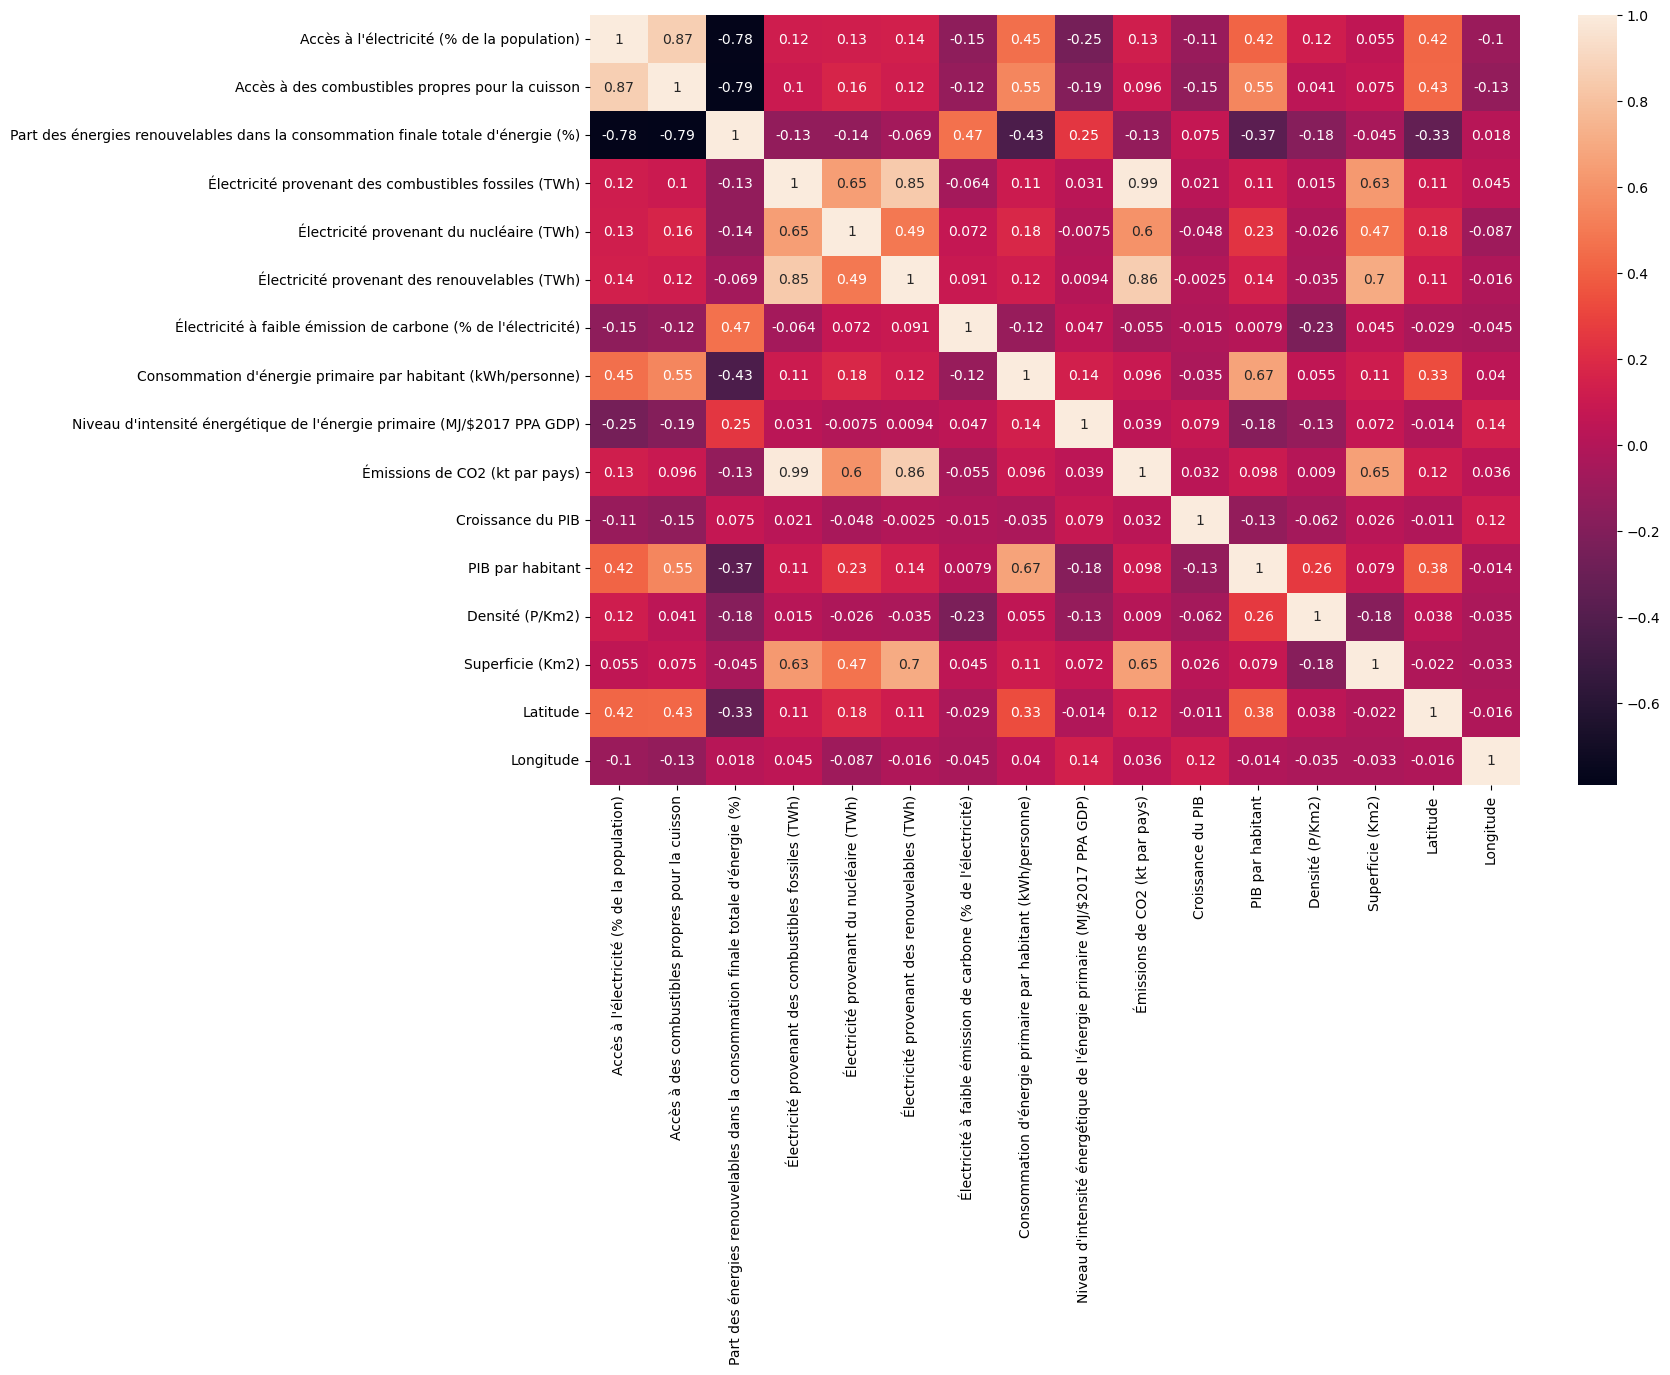

In [62]:
# scatter plot matrix des variables quantitatives
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True)
plt.show()
plt.show()

La relation croissante entre les value CO2 emission kt by country (émissions de CO2 par pays en kilotonnes) et electricity from fossil fuels (TWh) (électricité produite à partir de combustibles fossiles en térawattheures), cela suggère une corrélation positive entre ces deux variables. Cela signifie que, généralement, plus un pays produit d'électricité à partir de combustibles fossiles, plus ses émissions de CO2 tendent à être élevées.
(Ce qui paraît logique)

In [67]:
# Extraction des variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt
corr_threshold = 0.6
corr_vars = corr_matrix[abs(corr_matrix["Émissions de CO2 (kt par pays)"]) > corr_threshold].index.tolist()

# Affichage des variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt
print("Variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt (Émissions de CO2 (kt par pays)) :\n")
for vars in corr_vars:
    print(vars)

print("\n")
# Extraction des variables ayant une corrélation inférieure à -0.6 avec la variable d'intérêt
corr_threshold = -0.6
corr_vars = corr_matrix[abs(corr_matrix["Émissions de CO2 (kt par pays)"]) < corr_threshold].index.tolist()

# Affichage des variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt
print("Variables ayant une corrélation inférieure à -0.6 avec la variable d'intérêt (Émissions de CO2 (kt par pays)) :\n")
print(corr_vars)

Variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt (Émissions de CO2 (kt par pays)) :

Électricité provenant des combustibles fossiles (TWh)
Électricité provenant des renouvelables (TWh)
Émissions de CO2 (kt par pays)
Superficie (Km2)


Variables ayant une corrélation inférieure à -0.6 avec la variable d'intérêt (Émissions de CO2 (kt par pays)) :

[]


In [68]:

# Extraction des couples de variables ayant une corrélation supérieure à 0.8
corr_threshold = 0.8
corr_pairs = {}

for col in corr_matrix.columns:
    corr_pairs[col] = []
    corr_values = corr_matrix[abs(corr_matrix[col]) > corr_threshold][col].index.tolist()
    for pair in corr_values:
        if pair != col:
            corr_pairs[col].append(pair)

# Affichage des couples de variables ayant une corrélation supérieure à 0.8
print("Couples de variables ayant une corrélation supérieure à 0.8 :\n")
for col, pairs in corr_pairs.items():
    if len(pairs) > 0:
        for pair in pairs:
            print(col, "-", pair)

Couples de variables ayant une corrélation supérieure à 0.8 :

Accès à l'électricité (% de la population) - Accès à des combustibles propres pour la cuisson
Accès à des combustibles propres pour la cuisson - Accès à l'électricité (% de la population)
Électricité provenant des combustibles fossiles (TWh) - Électricité provenant des renouvelables (TWh)
Électricité provenant des combustibles fossiles (TWh) - Émissions de CO2 (kt par pays)
Électricité provenant des renouvelables (TWh) - Électricité provenant des combustibles fossiles (TWh)
Électricité provenant des renouvelables (TWh) - Émissions de CO2 (kt par pays)
Émissions de CO2 (kt par pays) - Électricité provenant des combustibles fossiles (TWh)
Émissions de CO2 (kt par pays) - Électricité provenant des renouvelables (TWh)


## Analyse en composantes principales

6) Réalisez une analyse en composantes principales des variables quantitatives et interprétez les résultats.

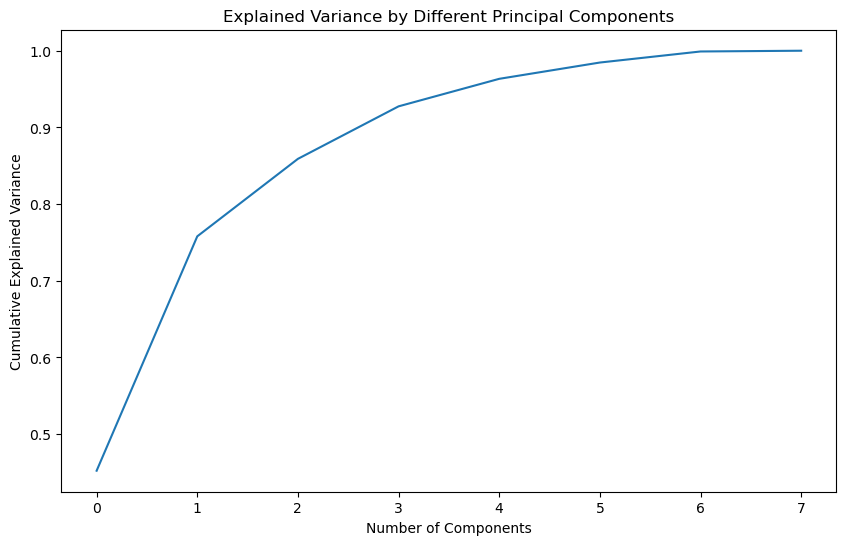

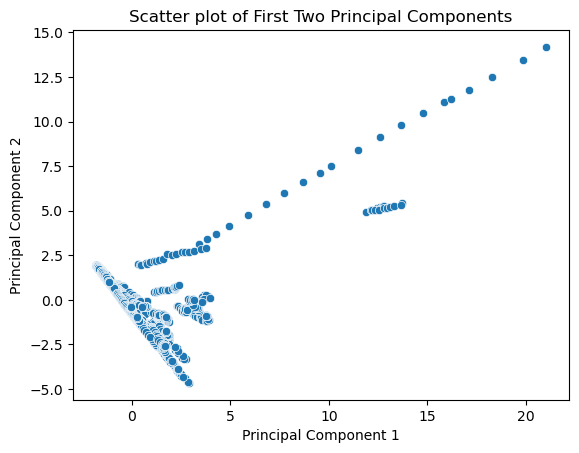

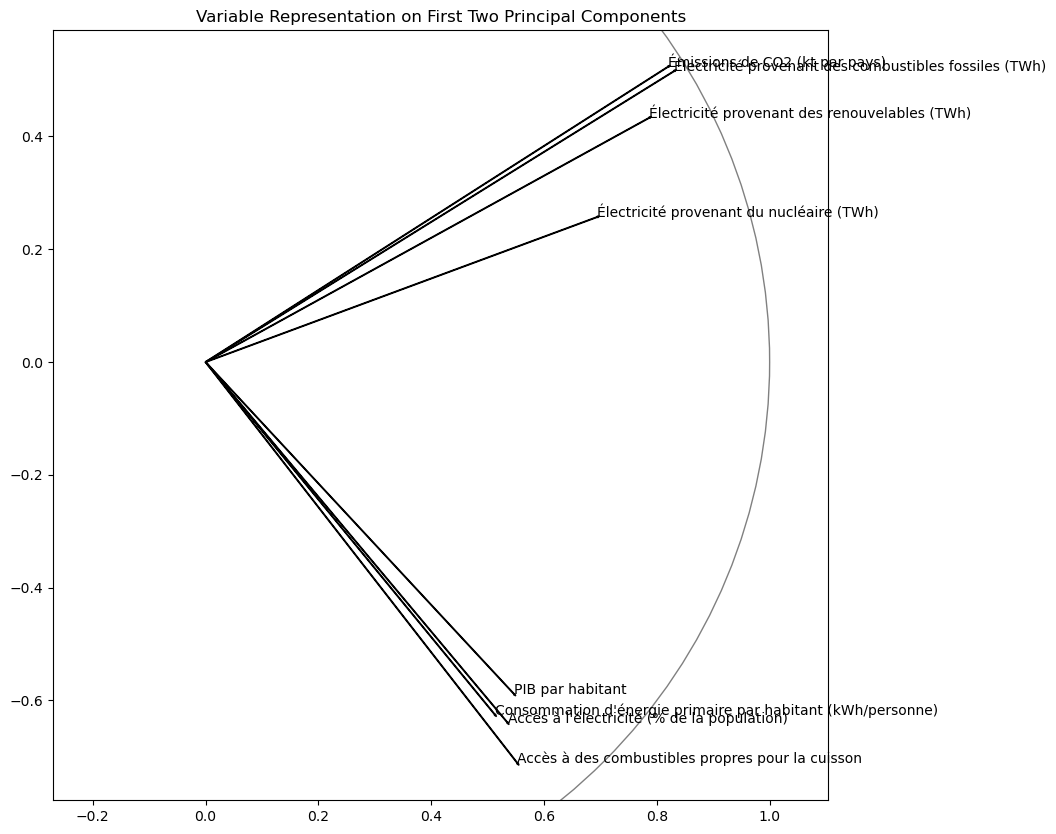

In [71]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Sélection des colonnes pour l'ACP
selected_columns = [
    'Accès à l\'électricité (% de la population)',
    'Accès à des combustibles propres pour la cuisson',
    'Électricité provenant des combustibles fossiles (TWh)',
    'Électricité provenant du nucléaire (TWh)',
    'Électricité provenant des renouvelables (TWh)',
    'Émissions de CO2 (kt par pays)',
    'PIB par habitant',
    'Consommation d\'énergie primaire par habitant (kWh/personne)',
]



# Préparation des données : élimination des valeurs manquantes et normalisation
data_for_pca = data[selected_columns].dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)


# Application de l'ACP
pca = PCA()
pca_results = pca.fit_transform(scaled_data)

# Variance expliquée par chaque composante principale
explained_variance = pca.explained_variance_ratio_

# Création d'un DataFrame pour les résultats de l'ACP
pca_df = pd.DataFrame(data=pca_results, columns=[f'PC{i+1}' for i in range(len(selected_columns))])

# Visualisation de la variance expliquée
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.show()

# Affichage des deux premières composantes principales
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter plot of First Two Principal Components')
plt.show()

# Affichage des coordonnées des variables sur les deux premières composantes principales
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])

for i, j, nom in zip(coord1, coord2, selected_columns):
    plt.text(i, j, nom)
    plt.arrow(0, 0, i, j, color='black')

plt.axis('equal')
plt.title('Variable Representation on First Two Principal Components')
c = plt.Circle((0, 0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()



## Dépendance entre variable Year et variable à prédire

7) Visualisez la possible dépendance entre la variable Year et la variable à prédire.

In [73]:
import plotly.express as px

# Calculate the maximum 'CO2' emissions for each 'Year'
CO2_By_Year = data.groupby('Année')['Émissions de CO2 (kt par pays)'].max().reset_index()

# line plot
fig_CO2_By_Year = px.line(
    CO2_By_Year,
    x='Année',
    y='Émissions de CO2 (kt par pays)',
    labels={'Year': 'Year', 'Value_co2_emissions_kt_by_country': 'Max CO2 Emissions (kt)'},
    title='Maximum CO2 Emissions by Year',
    height=500,  
    line_shape='linear',  
    line_dash_sequence=['solid'],  
    markers=True,  
    template='plotly_white' 
)

fig_CO2_By_Year.update_layout(
    xaxis_title_font=dict(size=14),
    yaxis_title_font=dict(size=14),
    title_font=dict(size=18)
)

fig_CO2_By_Year.show()
